In [0]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=14UD4Pq4lPkaYEgJi9OlHe83F1alUR_Ey'

In [0]:
fluff, id = link.split('=')
print (id)

14UD4Pq4lPkaYEgJi9OlHe83F1alUR_Ey


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('loan.csv')  
data = pd.read_csv('loan.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,loan_status
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,Fully Paid
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,Charged Off
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,Fully Paid
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,Fully Paid
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,Current


In [0]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  int64  
 3   funded_amnt                  887379 non-null  int64  
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [0]:
print(data['loan_status'].value_counts())

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


In [0]:
data['loan_status']=[1 if x=='Current' or x=='Fully Paid'  else 0 for x in data['loan_status']]

In [0]:
x=data.drop('loan_status',1)
y=data.loan_status

In [0]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [0]:
print(y.value_counts())

1    809502
0     77877
Name: loan_status, dtype: int64


In [0]:
print(x.head(5))

        id  member_id  ...  verification_status_joint  acc_now_delinq
0  1077501    1296599  ...                        NaN             0.0
1  1077430    1314167  ...                        NaN             0.0
2  1077175    1313524  ...                        NaN             0.0
3  1076863    1277178  ...                        NaN             0.0
4  1075358    1311748  ...                        NaN             0.0

[5 rows x 56 columns]


In [0]:
x.isnull().sum().sort_values(ascending=False)

dti_joint                      886870
annual_inc_joint               886868
verification_status_joint      886868
desc                           761351
mths_since_last_record         750326
mths_since_last_major_derog    665676
mths_since_last_delinq         454312
next_pymnt_d                   252971
emp_title                       51462
emp_length                      44825
last_pymnt_d                    17659
revol_util                        502
title                             152
collections_12_mths_ex_med        145
last_credit_pull_d                 53
total_acc                          29
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
open_acc                           29
pub_rec                            29
acc_now_delinq                     29
annual_inc                          4
initial_list_status                 0
grade                               0
verification_status                 0
home_ownersh

In [0]:
del x['dti_joint']

In [0]:
del x['annual_inc_joint']

In [0]:
del x['verification_status_joint']

In [0]:
x.isnull().sum().sort_values(ascending=False)

desc                           761351
mths_since_last_record         750326
mths_since_last_major_derog    665676
mths_since_last_delinq         454312
next_pymnt_d                   252971
emp_title                       51462
emp_length                      44825
last_pymnt_d                    17659
revol_util                        502
title                             152
collections_12_mths_ex_med        145
last_credit_pull_d                 53
total_acc                          29
delinq_2yrs                        29
earliest_cr_line                   29
open_acc                           29
pub_rec                            29
acc_now_delinq                     29
inq_last_6mths                     29
annual_inc                          4
initial_list_status                 0
grade                               0
verification_status                 0
home_ownership                      0
last_pymnt_amnt                     0
policy_code                         0
sub_grade   

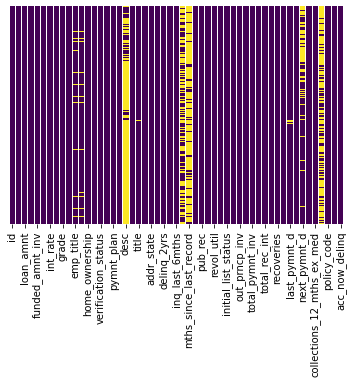

In [0]:
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
for col_name in x.columns:
    if x[col_name].dtypes=='object':
        unique_cat=len(x[col_name].unique())
        print("Feature {col_name} has {unique_cat} unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature term has 2 unique categories
Feature grade has 7 unique categories
Feature sub_grade has 35 unique categories
Feature emp_title has 299270 unique categories
Feature emp_length has 12 unique categories
Feature home_ownership has 6 unique categories
Feature verification_status has 3 unique categories
Feature issue_d has 103 unique categories
Feature pymnt_plan has 2 unique categories
Feature url has 887379 unique categories
Feature desc has 124470 unique categories
Feature purpose has 14 unique categories
Feature title has 63106 unique categories
Feature zip_code has 935 unique categories
Feature addr_state has 51 unique categories
Feature earliest_cr_line has 698 unique categories
Feature initial_list_status has 2 unique categories
Feature last_pymnt_d has 99 unique categories
Feature next_pymnt_d has 101 unique categories
Feature last_credit_pull_d has 104 unique categories
Feature application_type has 2 unique categories


In [0]:
print(x['url'].value_counts().sort_values(ascending=False).head(10))

https://www.lendingclub.com/browse/loanDetail.action?loan_id=17804057    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=2371024     1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1208184     1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=63344656    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1252078     1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=61662777    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=3300654     1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=5115886     1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=38568018    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=26397845    1
Name: url, dtype: int64


In [0]:
del x['url']

In [0]:
pd.get_dummies(x,sparse=True,drop_first=True).shape

(887379, 489026)

In [0]:
print(x['desc'].value_counts().sort_values(ascending=False).head(10))

                                                         246
Debt Consolidation                                        13
  Borrower added on 03/17/14 > Debt consolidation<br>     11
  Borrower added on 03/10/14 > Debt consolidation<br>     10
  Borrower added on 02/19/14 > Debt consolidation<br>      9
Camping Membership                                         8
  Borrower added on 01/29/14 > Debt consolidation<br>      8
  Borrower added on 01/22/14 > Debt consolidation<br>      7
  Borrower added on 01/15/14 > Debt consolidation<br>      7
  Borrower added on 03/07/14 > Debt consolidation<br>      6
Name: desc, dtype: int64


In [0]:
print(x['emp_title'].value_counts().sort_values(ascending=False).head(10))

Teacher             13469
Manager             11240
Registered Nurse     5525
Owner                5376
RN                   5355
Supervisor           4983
Sales                4212
Project Manager      3988
Driver               3569
Office Manager       3510
Name: emp_title, dtype: int64


In [0]:
print(x['emp_title'].value_counts().sort_values(ascending=False).head(10))

Teacher             13469
Manager             11240
Registered Nurse     5525
Owner                5376
RN                   5355
Supervisor           4983
Sales                4212
Project Manager      3988
Driver               3569
Office Manager       3510
Name: emp_title, dtype: int64


In [0]:
print(x['zip_code'].value_counts().sort_values(ascending=False).head(10))

945xx    9770
750xx    9417
112xx    9272
606xx    8641
300xx    8126
100xx    7609
070xx    7431
331xx    7416
900xx    7287
770xx    6938
Name: zip_code, dtype: int64


In [0]:
def one_hot_top(df,variable,top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label]=np.where(data[variable]==label,1,0)


In [0]:
top_10_1=[i for i in x['emp_title'].value_counts().sort_values(ascending=False).head(10).index]
top_10_1

['Teacher',
 'Manager',
 'Registered Nurse',
 'Owner',
 'RN',
 'Supervisor',
 'Sales',
 'Project Manager',
 'Driver',
 'Office Manager']

In [0]:
top_10_2=[i for i in x['title'].value_counts().sort_values(ascending=False).head(10).index]
top_10_2

['Debt consolidation',
 'Credit card refinancing',
 'Home improvement',
 'Other',
 'Debt Consolidation',
 'Major purchase',
 'Business',
 'Medical expenses',
 'Car financing',
 'Consolidation']

In [0]:
top_10_3=[i for i in x['desc'].value_counts().sort_values(ascending=False).head(10).index]
top_10_3

[' ',
 'Debt Consolidation',
 '  Borrower added on 03/17/14 > Debt consolidation<br>',
 '  Borrower added on 03/10/14 > Debt consolidation<br>',
 '  Borrower added on 02/19/14 > Debt consolidation<br>',
 'Camping Membership',
 '  Borrower added on 01/29/14 > Debt consolidation<br>',
 '  Borrower added on 01/22/14 > Debt consolidation<br>',
 '  Borrower added on 01/15/14 > Debt consolidation<br>',
 '  Borrower added on 03/07/14 > Debt consolidation<br>']

In [0]:
top_10_4=[i for i in x['zip_code'].value_counts().sort_values(ascending=False).head(10).index]
top_10_4

['945xx',
 '750xx',
 '112xx',
 '606xx',
 '300xx',
 '100xx',
 '070xx',
 '331xx',
 '900xx',
 '770xx']

In [0]:
one_hot_top(x,'emp_title',top_10_1)

In [0]:
print(x.head(10))

        id  member_id  ...  emp_title_Driver  emp_title_Office Manager
0  1077501    1296599  ...                 0                         0
1  1077430    1314167  ...                 0                         0
2  1077175    1313524  ...                 0                         0
3  1076863    1277178  ...                 0                         0
4  1075358    1311748  ...                 0                         0
5  1075269    1311441  ...                 0                         0
6  1069639    1304742  ...                 0                         0
7  1072053    1288686  ...                 0                         0
8  1071795    1306957  ...                 0                         0
9  1071570    1306721  ...                 0                         0

[10 rows x 62 columns]


In [0]:
one_hot_top(x,'title',top_10_2)
one_hot_top(x,'desc',top_10_3)
one_hot_top(x,'zip_code',top_10_4)

In [0]:
print(x.head(10))

        id  member_id  ...  zip_code_900xx  zip_code_770xx
0  1077501    1296599  ...               0               0
1  1077430    1314167  ...               0               0
2  1077175    1313524  ...               0               0
3  1076863    1277178  ...               0               0
4  1075358    1311748  ...               0               0
5  1075269    1311441  ...               0               0
6  1069639    1304742  ...               0               0
7  1072053    1288686  ...               1               0
8  1071795    1306957  ...               0               0
9  1071570    1306721  ...               0               0

[10 rows x 92 columns]


In [0]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 92 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   id                                                          887379 non-null  int64  
 1   member_id                                                   887379 non-null  int64  
 2   loan_amnt                                                   887379 non-null  int64  
 3   funded_amnt                                                 887379 non-null  int64  
 4   funded_amnt_inv                                             887379 non-null  float64
 5   term                                                        887379 non-null  object 
 6   int_rate                                                    887379 non-null  float64
 7   installment                                                 887379 non-nul

In [0]:
dummy_list=['term','grade','sub_grade','emp_length','home_ownership','verification_status','issue_d','pymnt_plan','purpose','next_pymnt_d','earliest_cr_line','addr_state','initial_list_status','last_pymnt_d','last_credit_pull_d','application_type']

In [0]:
def dummy_data(data,dummy_list):
    for i in dummy_list:
        dummies=pd.get_dummies(data[i],prefix=i,dummy_na=False,sparse=True)
        data=data.drop(i,1)
        data=pd.concat([data,dummies],axis=1)
    return data

In [0]:
x = dummy_data(x, dummy_list)
print(x.head(5))

        id  member_id  ...  application_type_INDIVIDUAL  application_type_JOINT
0  1077501    1296599  ...                            1                       0
1  1077430    1314167  ...                            1                       0
2  1077175    1313524  ...                            1                       0
3  1076863    1277178  ...                            1                       0
4  1075358    1311748  ...                            1                       0

[5 rows x 1312 columns]


In [0]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Columns: 1312 entries, id to application_type_JOINT
dtypes: Sparse[uint8, 0](1236), float64(26), int64(46), object(4)
memory usage: 580.7+ MB
None


In [0]:
for col_name in x.columns:
    if x[col_name].dtypes=='object':
        unique_cat=len(x[col_name].unique())
        print("Feature {col_name} has {unique_cat} unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature emp_title has 299270 unique categories
Feature desc has 124470 unique categories
Feature title has 63106 unique categories
Feature zip_code has 935 unique categories


In [0]:
del x['emp_title']

In [0]:
del x['desc']

In [0]:
del x['title']

In [0]:
del x['zip_code']

In [0]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Columns: 1308 entries, id to application_type_JOINT
dtypes: Sparse[uint8, 0](1236), float64(26), int64(46)
memory usage: 553.6 MB
None


In [0]:
x.isnull().sum().sort_values(ascending=False).head()

In [0]:
from sklearn.impute import SimpleImputer
import numpy as np
imp=SimpleImputer(missing_values=np.nan,strategy='mean')


In [0]:
x1=x[1:50000]
y1=y[1:50000]
x1.shape

(49999, 1308)

In [0]:
imp.fit(x1)
x1=pd.DataFrame(data=imp.transform(x1),columns=x1.columns)

In [0]:
x1.isnull().sum().sort_values(ascending=False).head()

In [0]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [0]:
s_x=sklearn.preprocessing.normalize(x1,norm='l2',axis=1,copy=True,return_norm=False)

In [0]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [0]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))


In [0]:
feature_sel_model.fit(x1,y1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1721.236278207135, tolerance: 0.753745570911421
  positive)


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [0]:
feature_sel_model.get_support()

array([False, False, False, ..., False, False, False])

In [0]:
x1train=pd.DataFrame(x1)

In [0]:
selected_feat=x1train.columns[(feature_sel_model.get_support())]

print('total features:{}'.format((x1train.shape[1])))
print('selected feature:{}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero={}'.format(np.sum(sel_.estimator_.coef_==0)))


total features:1308
selected feature:19


In [0]:
selected_feat

Index(['funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'mths_since_last_major_derog'],
      dtype='object')

In [0]:
x1train=x1train[selected_feat]

In [0]:
x1train.shape

(49998, 19)

In [0]:

x1train.isnull().sum().sort_values(ascending=False).head()

mths_since_last_major_derog    0
revol_util                     0
funded_amnt_inv                0
int_rate                       0
installment                    0
dtype: int64

In [0]:
y=y.values
y

array([1, 0, 1, ..., 1, 1, 1])

In [0]:
x1train1.isnull().sum().sort_values(ascending=False).head()

AttributeError: ignored

In [0]:
x11=x1train.to_numpy()

In [0]:
y11=y1.to_numpy()

In [0]:
from sklearn.model_selection import StratifiedKFold
accuracy=[]
skf=StratifiedKFold(n_splits=2)
skf.get_n_splits(x1,y1)
print(skf)

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)


In [0]:
for train_index,test_index in skf.split(x11,y11):
    print('Train:',train_index,'Test:',test_index)
    X1_train,X1_test=x11[train_index],x11[test_index]
    y1_train,y1_test=y11[train_index],y11[test_index]
    


Train: [23942 23943 23944 ... 49995 49996 49997] Test: [    0     1     2 ... 31742 31755 31758]
Train: [    0     1     2 ... 31742 31755 31758] Test: [23942 23943 23944 ... 49995 49996 49997]


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Embedding,LeakyReLU,BatchNormalization,Flatten
from keras.optimizers import Adam
from keras.activations import relu,sigmoid

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone

In [0]:
def create_model(layers,activation):
  model=Sequential()
  for i,nodes in enumerate(layers):
    if i==0:
      model.add(Dense(nodes,input_dim=26))
      model.add(Activation(activation))
    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
  model.add(Dense(units=2,activation='softmax'))
  model.compile(Adam(lr=0.001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
  return model



In [0]:
model=KerasClassifier(build_fn=create_model,verbose=0)
#clone(model)

In [0]:
layers=[(20,),(40,20),(45,30,15)]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
activations=['sigmoid','relu']
param_grid=dict(layers=layers,activation=activations,batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid)



In [0]:
grid_result=grid.fit(X1_train,y1_train)


NameError: ignored

In [0]:
[grid_result.best_score_,grid_result.best_params_]

[1.0,
 {'activation': 'relu',
  'batch_size': 20,
  'epochs': 100,
  'layers': (45, 30, 15)}]

In [0]:
create_model((45,30,15),'relu')

In [0]:
import keras
from keras.models import Sequential

In [0]:
model1=Sequential([Dense(16,input_dim=19,activation="relu"),Dense(3,activation="relu"),Dense(2,activation="softmax")])
model1.compile(Adam(lr=0.001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                320       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 51        
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 8         
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1.fit(X1_train,y1_train ,validation_split=0.1,batch_size=20 ,epochs=100)


In [0]:
predictions=model1.predict(X1_test,batch_size=20,verbose=0)

In [0]:
rounded_predictions=model1.predict_classes(X1_test,batch_size=10,verbose=0)
rounded_predictions

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
predictions

array([[6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [1.00000000e+00, 7.69375915e-22],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [1.00000000e+00, 0.00000000e+00],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [1.00000000e+00, 1.09485050e-31],
       [6.03432804e-02, 9.39656734e-01],
       [6.03432804e-02, 9.39656734e-01],
       [9.999994

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
target_names=['risky','non_risky']
print(classification_report(y1_test,rounded_predictions,target_names=target_names))


              precision    recall  f1-score   support

       risky       0.00      0.00      0.00       778
   non_risky       0.84      1.00      0.92      4221

    accuracy                           0.84      4999
   macro avg       0.42      0.50      0.46      4999
weighted avg       0.71      0.84      0.77      4999



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
print(confusion_matrix(y1_test,rounded_predictions))

[[   0  778]
 [   0 4221]]
